Importação dos dados que estão presente em um repositório no Github no formato de arquivos .csv

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
x1 = pd.read_csv('https://github.com/ascdavia/DeepLearning_SignalProcessing-sEMG/blob/main/Database/sEMG_Basic_Hand_movements_upatras/Database_1/df1_mov_all.csv?raw=true', compression = None)
x = x1.drop(x1.columns[0], axis=1)

In [ ]:
x = x.values.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(900, 3000, 1)


Definição da matriz de saída *y*

In [ ]:
base = np.ones((150,1), dtype=np.int64)
mov_cyl = base*0
mov_hook = base*1
mov_lat = base*2
mov_palm = base*3
mov_spher = base*4
mov_tip = base*5

In [ ]:
y = np.vstack([mov_cyl,mov_hook,mov_lat,mov_palm,mov_spher,mov_tip])

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
treinoX, testeX, treinoY, testeY = train_test_split(x, y, test_size=0.15, random_state=42)

K-Fold - CNN 1D

In [ ]:
import tensorflow as tf
import keras
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import GlobalAveragePooling1D
from keras.layers import Flatten

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
num_classes = 6

model = keras.models.Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(treinoX.shape[1], treinoX.shape[2])))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
#model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
kf = KFold(n_splits = 25)

In [ ]:
x2 = treinoX
y2 = treinoY
kf.get_n_splits(x2)

25

In [ ]:
for train_index, test_index in kf.split(x2): 
  X_train, X_test = x2[train_index], x2[test_index]
  y_train, y_test = y2[train_index], y2[test_index]
 
  # fit model
  model.fit(X_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
46/46 [==============================] - 9s 169ms/step - loss: 1.8014 - accuracy: 0.2125
Epoch 2/10
46/46 [==============================] - 8s 166ms/step - loss: 1.1920 - accuracy: 0.5150
Epoch 3/10
46/46 [==============================] - 8s 166ms/step - loss: 0.6146 - accuracy: 0.8011
Epoch 4/10
46/46 [==============================] - 8s 171ms/step - loss: 0.2478 - accuracy: 0.9332
Epoch 5/10
46/46 [==============================] - 8s 170ms/step - loss: 0.1016 - accuracy: 0.9864
Epoch 6/10
46/46 [==============================] - 8s 166ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 7/10
46/46 [==============================] - 8s 166ms/step - loss: 0.0135 - accuracy: 0.9986
Epoch 8/10
46/46 [==============================] - 8s 167ms/step - loss: 0.0079 - accuracy: 0.9986
Epoch 9/10
46/46 [==============================] - 8s 167ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 10/10
46/46 [==============================] - 8s 167ms/step - loss: 0.0062 - accuracy: 1.0000

In [ ]:
from sklearn.metrics import confusion_matrix

pred = model.predict(testeX)
Y_pred = pred.argmax(axis=-1)

In [ ]:
cm = confusion_matrix(testeY, Y_pred)
print(cm)

[[ 6  1  2  6  5  1]
 [ 1 10  2  2  6  2]
 [ 0  2 15  1  1  5]
 [ 4  1  4  6  5  5]
 [ 5  7  0  0  6  0]
 [ 1  1  6  5  1 10]]


In [ ]:
qualidade = cm.diagonal()/cm.sum(axis=1)
qualidade

array([0.28571429, 0.43478261, 0.625     , 0.24      , 0.33333333,
       0.41666667])

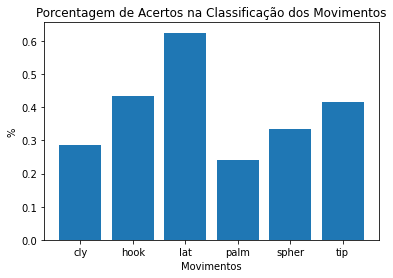

In [ ]:
import matplotlib.pyplot as plt

grupos = ['cly', 'hook', 'lat', 'palm', 'spher', 'tip']
plt.bar(grupos, qualidade)
plt.xlabel('Movimentos')
plt.ylabel('%')
plt.title('Porcentagem de Acertos na Classificação dos Movimentos')
plt.show()

In [ ]:
desvio = np.std(qualidade)
desvio

0.1255154936039765

In [ ]:
df_cm = pd.DataFrame(cm, range(6),range(6))

In [ ]:
pip install pretty_confusion_matrix

     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 15.7 MB 10.7 MB/s 
     |████████████████████████████████| 11.3 MB 55.3 MB/s 
     |████████████████████████████████| 156 kB 63.7 MB/s 
     |████████████████████████████████| 191 kB 60.5 MB/s 
     |████████████████████████████████| 103 kB 64.1 MB/s 
     |████████████████████████████████| 11.2 MB 36.2 MB/s 
     |████████████████████████████████| 843 kB 70.1 MB/s 
     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 41 kB 545 kB/s 
     |████████████████████████████████| 890 kB 55.7 MB/s 
     |████████████████████████████████| 6.5 MB 56.2 MB/s 
     |████████████████████████████████| 98 kB 6.7 MB/s 
     |████████████████████████████████| 596 kB 52.8 MB/s 
     |████████████████████████████████| 461 kB 71.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstall

/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.7/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

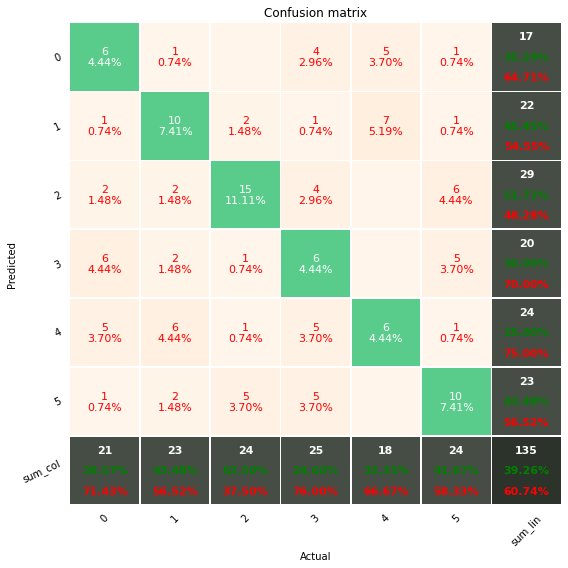

In [ ]:
import numpy as np
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)